## Introduction

In [1]:
# import general use libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import libraries for pagerank testing
from libs.cython.pyx.utils import list2matrix
from libs.cython.pyx.edgelistParser import edgelistParser
from libs.cython.cpp.pageRankCpp import cppGetDegree, cppLocalPageRank_weight, cppLocalPageRank

In [3]:
# load a dataset, in both weighted and unweighted forms
A_weighted, N, original_idxs = edgelistParser("../datasets/facebook/0.edges", "raw_list", True)
A, _, _ = edgelistParser("../datasets/facebook/0.edges", "raw_list", False)

In [5]:
# test performance on both verions
print("Weighted version, slower:")
%timeit cppLocalPageRank_weight(A_weighted, c=0.85, return_only_neighbours=True)
print("Unweighted version, faster:")
%timeit cppLocalPageRank(A, c=0.85, return_only_neighbours=True)

Weighted version, slower:
621 ms ± 26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Unweighted version, faster:
95 ms ± 676 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Difference between Local PageRank Computations: 0.0


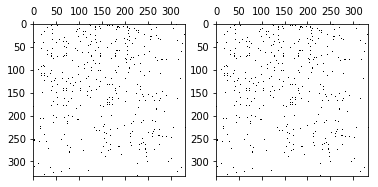

In [7]:
# generate the L matrix, assuming both weighted and unweighted input
L_weighted = cppLocalPageRank_weight(A_weighted, c=0.85, return_only_neighbours=True)
L = cppLocalPageRank(A, c=0.85, return_only_neighbours=True)

# convert to numpy matrix, to visually check the results
L_weighted_mat = list2matrix(L_weighted)
L_mat = list2matrix(L)

# plot the matrices' spy 
fig, axs = plt.subplots(1, 2)
axs[0].spy(L_weighted_mat)
axs[1].spy(L_mat)

# and print the difference to check that the same result was obtained
print("Difference between Local PageRank Computations:",np.linalg.norm(L_mat-L_weighted_mat))